<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/Classification_keras28Jan2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, we will learn how to use the Keras library to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images, for a change.

The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
    
The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01).

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.

In [ ]:
import keras
from keras.models import Sequential  #to create a linear stack of layers for building a neural network model.
from keras.layers import Dense #Imports the Dense layer, a fully connected layer, which is a fundamental building block in neural networks.
from keras.utils import to_categorical # Imports a utility function to convert class vectors to binary class matrices. This is often used for one-hot encoding of target labels.

import matplotlib.pyplot as plt

#importing the dataset from keras

from keras.datasets import mnist

#reading the dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

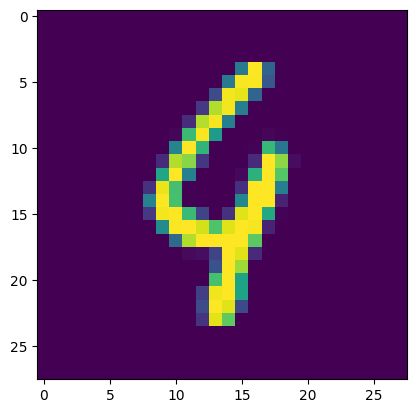

In [ ]:
plt.imshow(X_test[115])

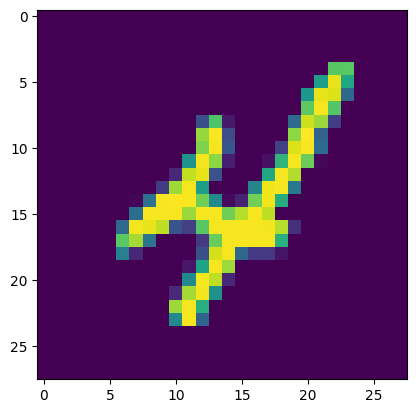

In [ ]:
plt.imshow(X_train[9])

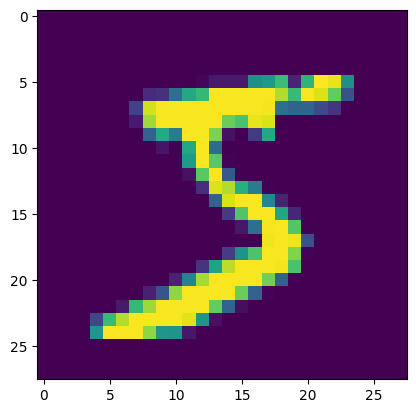

In [ ]:
plt.imshow(X_train[0])
plt.show()

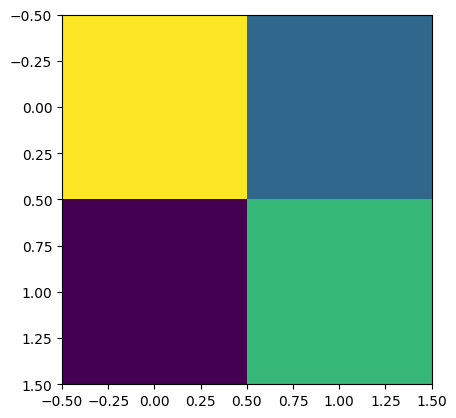

In [ ]:
plt.imshow([[9, 5], [3, 7]])

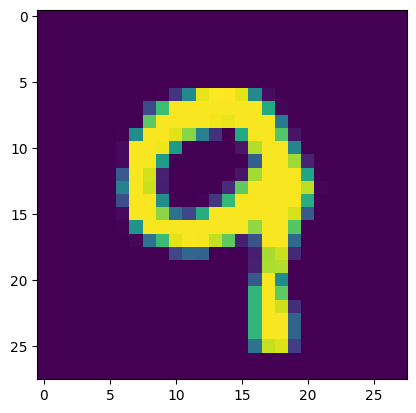

In [ ]:
plt.imshow(X_test[99])

**Flatten the images**

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [ ]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train[300:305]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
'''[ixels values are 0-255
we need to normalise the all the values by dividing them on 255'''

X_train =X_train/255
X_test = X_test/255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
def classification_model():
  #creating the model
  model = Sequential()
  model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  #compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
#train and test the network

model = classification_model()

#fitting / learning
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

#evaluating the model

scores = model.evaluate(X_test, y_test, verbose=1)

print('Accuracy: {}% \n Error: {}'.format((scores[1])*100, 1 - scores[1]))

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1830 - accuracy: 0.9451 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0791 - accuracy: 0.9756 - val_loss: 0.0775 - val_accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0861 - val_accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0733 - val_accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0822 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0736 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0790 -